# Matching Strategy

In [1]:
import sys
sys.path.append('../')

from ssd_data import datasets
from ssd_data import transforms, target_transforms, utils
from ssd.models.ssd300 import SSD300

In [2]:
transform = transforms.Compose(
    [transforms.Resize((300, 300)),
     transforms.ToTensor()]
)
target_transform = target_transforms.Compose(
    [target_transforms.ToCentroids(),
     target_transforms.OneHot(class_nums=datasets.VOC_class_nums, add_background=True),
     target_transforms.ToTensor()]
)
dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                           ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform)

model = SSD300(dataset.class_labels, batch_norm=False)

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch

from ssd.core.boxes import centroids2corners
from ssd.core.inference import toVisualizeRGBImg, tensor2cvrgbimg, toVisualizeRectangleRGBimg

21503
tensor([[0.8500, 0.4461, 0.0600, 0.1856],
        [0.2080, 0.4805, 0.1120, 0.1467],
        [0.4480, 0.4985, 0.0680, 0.0868]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([3, 4])
torch.Size([3])


<IPython.core.display.Javascript object>


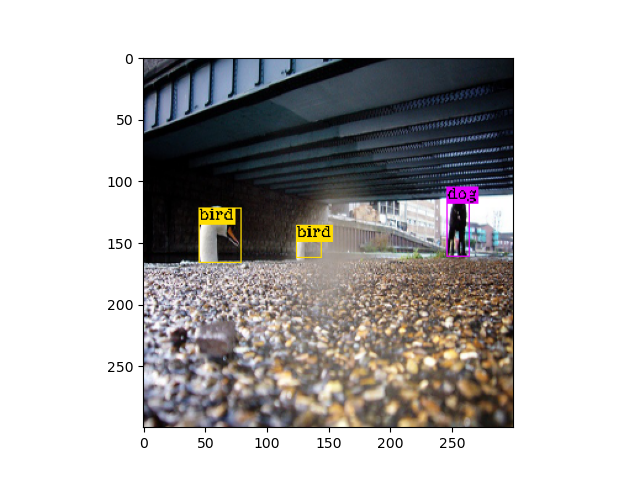

In [4]:
print(len(dataset))
ind_dataset = 2000

img, targets = dataset[ind_dataset]
loc, conf = targets[:, :4], targets[:, 4:]

print(loc)
print(conf)

print(loc.shape)
print(conf.argmax(dim=1).shape)

plt.figure()
plt.imshow(toVisualizeRGBImg(img, loc, conf_indices=conf.argmax(dim=1), classes=dataset.class_labels))

In [5]:
from ssd.core.boxes import matching_strategy

model.load_vgg_weights()

print(img.shape)
print(targets.shape)

imgs, gts = utils.batch_ind_fn((dataset[ind_dataset],))
print(gts)
print(imgs.shape)

box_num = imgs.shape[0]

# matching
dboxes = model.defaultBox.dboxes
pos_indicator, matched_gts = matching_strategy(gts, dboxes, batch_num=1)
gt_locs, gt_confs = matched_gts[:, :, :4], matched_gts[:, :, 4:]

torch.Size([3, 300, 300])
torch.Size([3, 25])
(tensor([[0.8500, 0.4461, 0.0600, 0.1856, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2080, 0.4805, 0.1120, 0.1467, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4480, 0.4985, 0.0680, 0.0868, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]),)
torch.Size([1, 3, 300, 300])


<IPython.core.display.Javascript object>


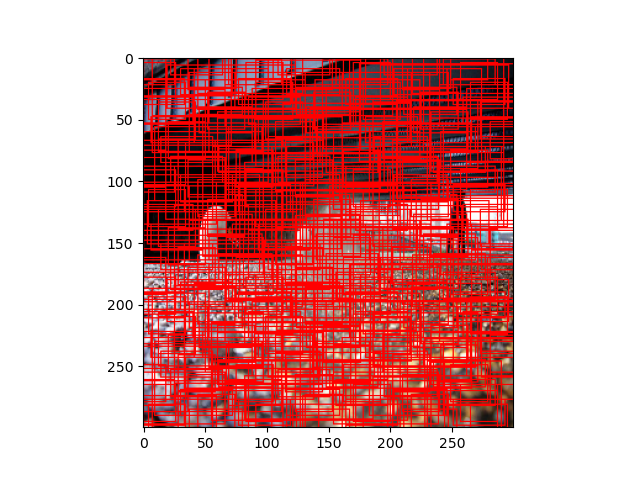

In [6]:
dbox_img = toVisualizeRectangleRGBimg(img, dboxes[::22], thickness=1)
    
plt.figure()
#plt.imshow(resized_img)
plt.imshow(dbox_img)

In [7]:
voc_classes = datasets.VOC_class_labels + ['back ground']

print(voc_classes, len(voc_classes))
print(gt_locs[pos_indicator].shape)
#print(gt_locs[0].tolist())
print(gt_confs[pos_indicator].argmax(dim=1).shape)
print(gt_confs[0].argmax(dim=1).tolist())

print(gt_locs[pos_indicator].tolist())

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor', 'back ground'] 21
torch.Size([21, 4])
torch.Size([21])
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 

<IPython.core.display.Javascript object>


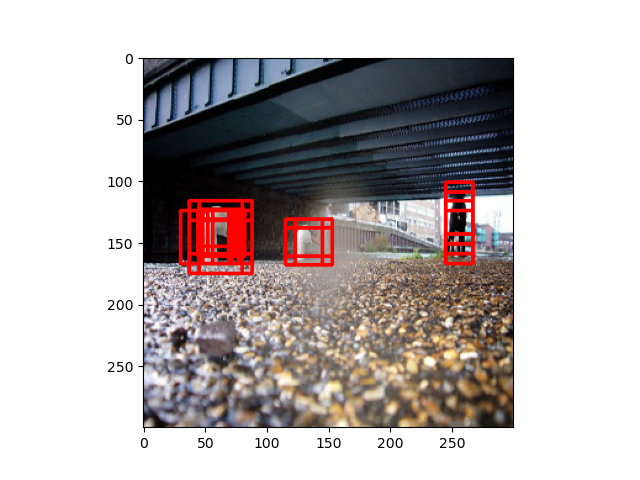

In [8]:
plt.figure()
dboxes_b = torch.cat([dboxes.unsqueeze(0)] * box_num, dim=0)
plt.imshow(toVisualizeRectangleRGBimg(img, dboxes_b[pos_indicator]))
#plt.imshow(toVisualizeImg(img, gt_locs[pos_indicator], conf_indices=gt_confs[pos_indicator].argmax(dim=1), classes=voc_classes))

<IPython.core.display.Javascript object>


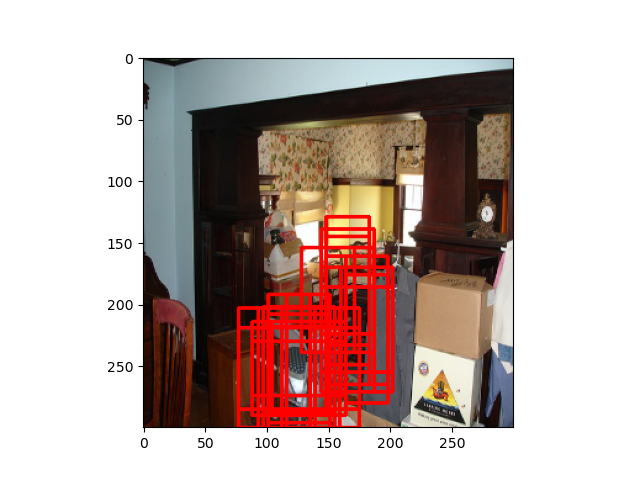

In [9]:
ind_dataset = 0

img, targets = dataset[ind_dataset]
imgs, gts = utils.batch_ind_fn((dataset[ind_dataset],))

box_num = imgs.shape[0]

# matching
dboxes = model.defaultBox.dboxes
pos_indicator, matched_gts = matching_strategy(gts, dboxes, batch_num=1)
gt_locs, gt_confs = matched_gts[:, :, :4], matched_gts[:, :, 4:]

plt.figure()
dboxes_b = torch.cat([dboxes.unsqueeze(0)] * box_num, dim=0)
plt.imshow(toVisualizeRectangleRGBimg(img, dboxes_b[pos_indicator]))

<IPython.core.display.Javascript object>


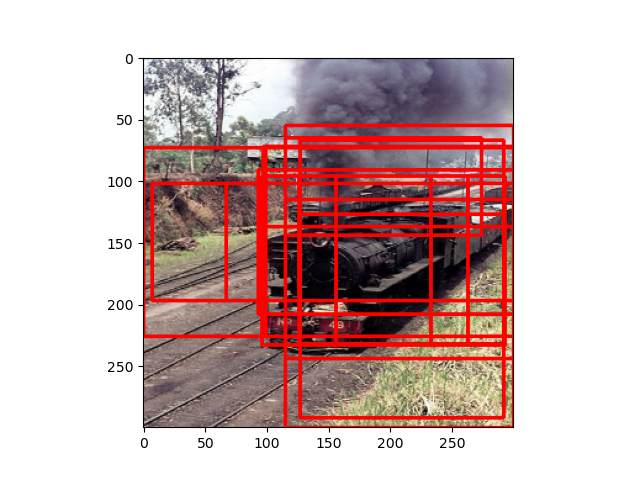

In [10]:
ind_dataset = 15

img, targets = dataset[ind_dataset]
imgs, gts = utils.batch_ind_fn((dataset[ind_dataset],))

box_num = imgs.shape[0]

# matching
dboxes = model.defaultBox.dboxes
pos_indicator, matched_gts = matching_strategy(gts, dboxes, batch_num=1)
gt_locs, gt_confs = matched_gts[:, :, :4], matched_gts[:, :, 4:]

plt.figure()
dboxes_b = torch.cat([dboxes.unsqueeze(0)] * box_num, dim=0)
plt.imshow(toVisualizeRectangleRGBimg(img, dboxes_b[pos_indicator]))

(246, 1) (264, 1) (255, 0, 0)
uint8 (300, 300, 3)


<IPython.core.display.Javascript object>


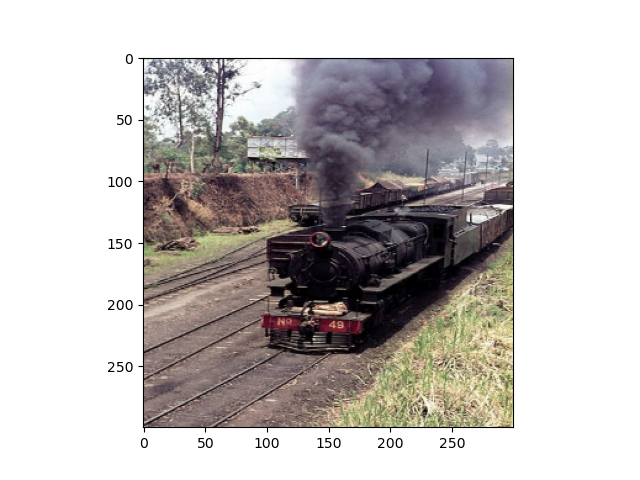

<class 'int'>


array([[[244, 252, 252],
        [198, 208, 206],
        [151, 160, 157],
        ...,
        [170, 170, 171],
        [172, 172, 171],
        [181, 182, 177]],

       [[236, 241, 244],
        [186, 192, 192],
        [223, 229, 226],
        ...,
        [160, 159, 162],
        [162, 162, 160],
        [175, 175, 173]],

       [[234, 233, 239],
        [224, 224, 227],
        [247, 248, 245],
        ...,
        [160, 160, 162],
        [160, 160, 159],
        [172, 172, 170]],

       ...,

       [[160, 153, 147],
        [ 84,  78,  72],
        [ 29,  22,  20],
        ...,
        [220, 207, 157],
        [207, 196, 138],
        [234, 228, 161]],

       [[ 13,   1,   0],
        [ 31,  16,  11],
        [ 89,  73,  72],
        ...,
        [144, 129,  81],
        [215, 205, 148],
        [250, 246, 182]],

       [[136, 121, 115],
        [184, 169, 165],
        [155, 139, 138],
        ...,
        [170, 154, 109],
        [209, 199, 146],
        [252, 249, 186]]

In [11]:
angles = np.linspace(0, 255, 20).astype(np.uint8)
#print(angles.shape)
hsvs = np.array((0, 255, 255))[np.newaxis, np.newaxis, :].astype(np.uint8)
hsvs = np.repeat(hsvs, 20, axis=0)
#print(hsvs.shape)
hsvs[:, 0, 0] += angles

rgbs = cv2.cvtColor(hsvs, cv2.COLOR_HSV2RGB).astype(np.int)
locs_mm = centroids2corners(loc).numpy()

h, w, c = img.shape
locs_mm[:, ::2] *= w
locs_mm[:, 1::2] *= h
locs_mm = np.clip(locs_mm, 0, w).astype(np.int)

topleft = locs_mm[0, :2]
bottomright = locs_mm[0, 2:]
print(tuple(topleft), tuple(bottomright), tuple(rgbs[0, 0]))
print(tensor2cvrgbimg(img).dtype, tensor2cvrgbimg(img).shape)
plt.figure()
plt.imshow(tensor2cvrgbimg(img))
a = tuple(rgbs[0, 0].tolist())
print(type(a[0]))
cv2.rectangle(tensor2cvrgbimg(img), tuple(topleft), tuple(bottomright), a, 2)